# RETROGRADE

In [1]:
import scipy.special
from matplotlib import pyplot
import numpy

from discohisto.stats import poisson_log_minus_max

In [2]:
def plot_r(ns, point_to_weight, range_):
    x = numpy.linspace(*range_, 513)
    
    points = list(point_to_weight)
    weights = numpy.array(list(point_to_weight.values()))
    log_weights = numpy.log(weights / weights.sum())
    
    def logl(n, x):
        return _logmeanexp([
            poisson_log_minus_max(n, x + point) + log_weight
            for point, log_weight in zip(points, log_weights)
        ])
    
    colors = ["xkcd:blue", "xkcd:red", "xkcd:orange", "xkcd:yellow", "xkcd:lime green"]
    
    for n_i, color_i in zip(ns, colors):
        pyplot.plot(x, logl(n_i, x) - logl(n_i, 0), color_i)
    
    pyplot.axhline(-3, c="k", ls="--", alpha=0.5)
    
    pyplot.ylim(-6.5, 0.5)
    pyplot.xlim(*range_)
    pyplot.show()
    

def _logmeanexp(x, axis=0):
    x = numpy.asarray(x)
    norm = numpy.log(x.shape[axis])
    return scipy.special.logsumexp(x, axis=axis) - norm

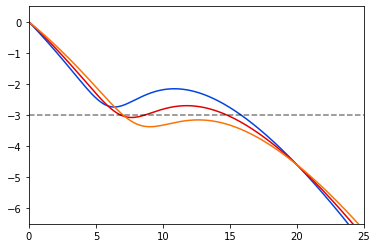

In [3]:
plot_r(
    [11, 12, 13],
    {0: 1, 20: 99},
    [0, 25],
)